# Waka
## An exploration of the best-selling videogames in history

### 1. Setup workspace

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Append folder for custom libraries
import sys
sys.path.append('libraries')
import shinypanda

vg_sales = pd.read_csv('data/vgsales.csv') 
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


### 2. Clean dataframe

#### 2.1 Remove VGChartz meta columns
*Last_Update*, *url*, *status*, *Vgchartzscore* and *img_url*

In [2]:
try:
    vg_sales = vg_sales.drop(['Last_Update', 'url', 'status', 'Vgchartzscore', 'img_url'], axis=1)
except:
    print('Columns could not be removed. Probably the cell had been executed before.')
    
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


#### 2.2 Remove columns with a significative percentage of empty values

In [3]:
#By default, 'wipe_empty_columns' remove columns with more than 70% of NaN
vg_sales = shinypanda.wipe_empty_columns(vg_sales)
vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2009.0


#### 2.3 Turn years into int

In [12]:
#Fill 'NaN' with 0 to avoid conversion error
vg_sales['Year'] = vg_sales['Year'].fillna(0)

#Convert values to 'int'. 
#Conversion to float avoids this: https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
vg_sales['Year'] = vg_sales['Year'].astype('float64').astype('int64')

#Remove 0 values
#vg_sales['Year'][vg_sales['Year'] == 0] = np.nan

#vg_sales = vg_sales.replace({'Year': {0: np.nan}}) 

vg_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2006
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,1985
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,2008
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,2017
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2009


In [13]:
vg_sales

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2006
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,1985
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,2008
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,2017
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,2009
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,1998
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,2006
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,1989
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,2009
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,2010


### 3. Visualization of the data

#### 3.1 Best publish years
It should be noted that the number of games published each year has been growing

In [6]:
annual_sales = vg_sales.groupby(['Year']).count()
annual_sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales
Year,,,,,,,,,
0,979,979,979,979,100,979,979,976,38
1970,104,104,104,104,43,104,104,104,10
1973,1,1,1,1,0,1,1,1,0
1975,1,1,1,1,1,1,1,1,0
1977,12,12,12,12,0,12,12,12,3


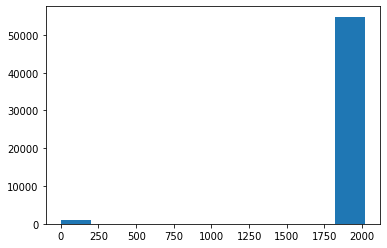

In [7]:
plt.hist(vg_sales["Year"]);